In [0]:
import glob
import yaml
import cv2
import numpy as np
import os
from random import shuffle
import tensorflow as tf
import matplotlib.pyplot as plt
from PIL import Image 
import pandas as pd
import seaborn as sns
from skimage.transform import rescale, resize
from skimage.color import rgb2gray
from skimage.feature import local_binary_pattern
from skimage.feature import hog
from skimage import data, exposure
from skimage.io import imread, imshow
from sklearn.metrics import mean_squared_error
from sklearn import svm
from sklearn.metrics import classification_report,accuracy_score
import itertools 
import imutils 

In [0]:
def image_path(img_type, img_number):
    #image_type: 'images' #original image, 'annotations' #crop-weed label, 'mask' #vegetation segmentation
    #image_number: the number on the image name
    image_name = img_type[:-1]
    if img_number < 10:
        path = '/content/'+img_type+'/00'+str(img_number)+'_'+str(image_name)+'.png'
    else:
        path = '/content/'+img_type+'/0'+str(img_number)+'_'+str(image_name)+'.png'
    return path

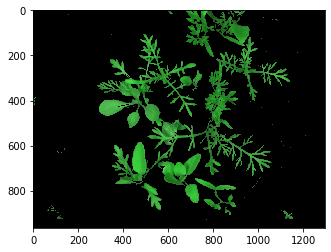

In [0]:
original_image =cv2.imread(image_path('images',1))
#convert GRB color to HSV color 
image_hsv = cv2.cvtColor(original_image, cv2.COLOR_BGR2HSV)
sensitivity = 40
lower_hsv = np.array([60 - sensitivity, 120, 80])
upper_hsv = np.array([60 + sensitivity, 255, 255])

# create mask
mask = cv2.inRange(image_hsv, lower_hsv, upper_hsv)

img_mask = cv2.bitwise_and(original_image, original_image, mask = mask)

plt.imshow(img_mask)

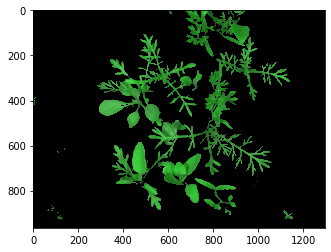

In [0]:
#applying median filter 
median_out = cv2.medianBlur(img_mask, 5)
plt.imshow(median_out)

(966, 1296, 3)

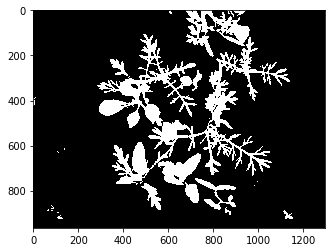

In [0]:
ret, ImgBW = cv2.threshold(median_out,0,255,cv2.THRESH_BINARY)
plt.imshow(ImgBW)
ImgBW.shape

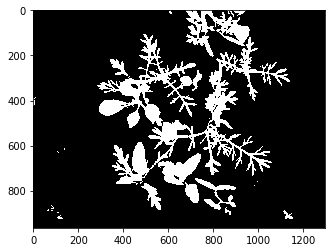

In [0]:
Img_Gradient = ImgBW
plt.imshow(Img_Gradient)

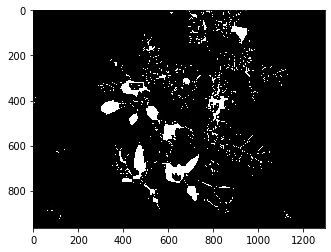

In [0]:

kernel = np.ones((3,3),np.uint8)
for i in range(7):
  Gradient = cv2.morphologyEx(Img_Gradient, cv2.MORPH_GRADIENT, kernel)
  Img_Gradient = Img_Gradient - Gradient
plt.imshow(Img_Gradient)

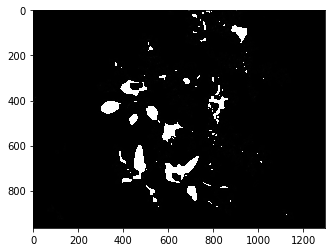

In [0]:
Gradient_median = cv2.medianBlur(Img_Gradient, 7)
plt.imshow(Gradient_median)

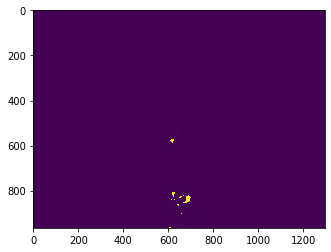

In [0]:

cnvt_img = cv2.cvtColor(Gradient_median, cv2.COLOR_BGR2GRAY)
plt.imshow(cnvt_img)

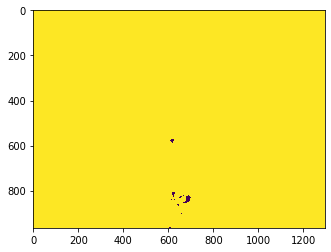

In [0]:
ret,binary = cv2.threshold(cnvt_img, 0, 255, cv2.THRESH_OTSU | cv2.THRESH_BINARY_INV)
plt.imshow(binary)
contours ,_= cv2.findContours(binary, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)


In [0]:
image  = Image.new('RGB',(1296,966),color=(0,255,0))
Img_out = np.multiply((ImgBW/255),image)

In [0]:

contour = []
max_area = 0
for cnt in contours :
  area = cv2.contourArea(cnt)
  if area > max_area:
    max_area = area 
  if area > 700:
    if area == max_area: 
      continue
    else:
      contour.append(cnt)
  else:
    continue
img_org = cv2.drawContours(original_image, contour , -1, (255,0,0),thickness =cv2.FILLED)
img= cv2.drawContours(median_out, contour , -1, (255,0,0),thickness =cv2.FILLED)
Img_out= cv2.drawContours(Img_out, contour , -1, (255,0,0),thickness =cv2.FILLED)


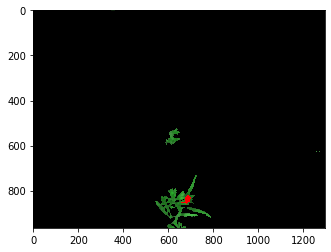

In [0]:
plt.imshow(img)
I = img

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


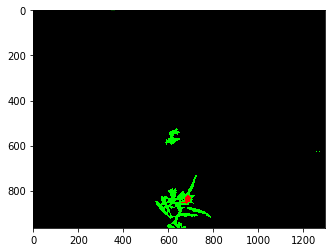

In [0]:
plt.imshow(Img_out)

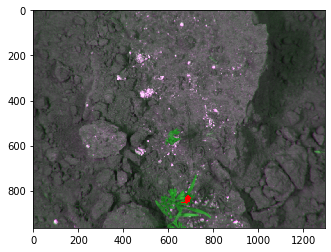

In [0]:
plt.imshow(img_org)

In [0]:
train_data=[2, 5, 6, 7, 8, 11, 12, 14, 16, 17, 18, 19, 20, 23, 24, 25, 27, 28, 31, 33, 34, 36, 37, 38, 40, 41, 42, 43, 45, 46, 49, 50, 51, 52, 53, 55, 56, 57, 58, 59]
for i in train_data:
  original_image =cv2.imread(image_path('images',i))


def ImageSegmentation(image):
  #convert GRB color to HSV color 
  image_hsv = cv2.cvtColor(original_image, cv2.COLOR_BGR2HSV)
  sensitivity = 40
  lower_hsv = np.array([60 - sensitivity, 120, 80])
  upper_hsv = np.array([60 + sensitivity, 255, 255])

  # create mask
  mask = cv2.inRange(image_hsv, lower_hsv, upper_hsv)

  img_mask = cv2.bitwise_and(original_image, original_image, mask = mask)
  
  plt.figure(figsize=(10,10))
  plt.subplot(2,2,1)
  plt.imshow(img_mask)

  #applying median filter 
  median_out = cv2.medianBlur(img_mask, 5)
  plt.subplot(2,2,2)
  plt.imshow(median_out)

  #Binary Image with threshold
  ret, ImgBW = cv2.threshold(median_out,0,255,cv2.THRESH_BINARY)
  plt.subplot(2,2,3)
  plt.imshow(ImgBW)

  #Image Copy 
  Img_Gradient = ImgBW

  #Image Gradient
  kernel = np.ones((3,3),np.uint8)
  for i in range(7):
    Gradient = cv2.morphologyEx(Img_Gradient, cv2.MORPH_GRADIENT, kernel)
    Img_Gradient = Img_Gradient - Gradient
  plt.subplot(2,2,4)
  plt.imshow(Img_Gradient)


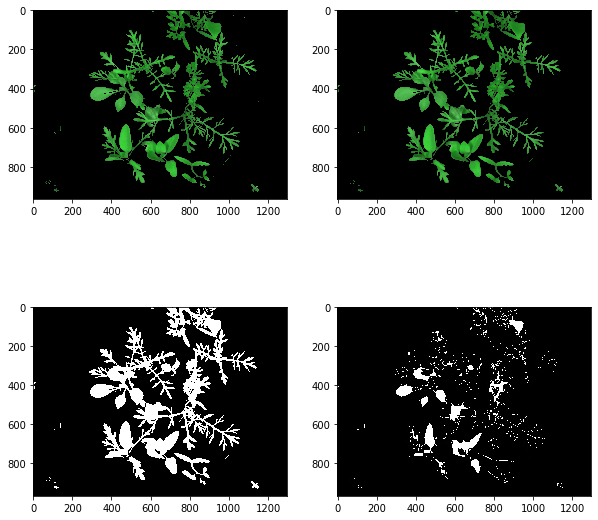

In [0]:
original_image =cv2.imread(image_path('images',1))
ImageSegmentation(original_image)